In [6]:
from transformers import pipeline

In [18]:
checkpoint = "openai/clip-vit-base-patch16"

model = CLIPModel.from_pretrained(checkpoint)
processor = CLIPProcessor.from_pretrained(checkpoint)

In [7]:
# !wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
# !tar -xvf VOCtrainval_11-May-2012.tar

--2024-07-29 13:55:34--  http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1999639040 (1.9G) [application/x-tar]
Saving to: ‘VOCtrainval_11-May-2012.tar’

VOCtrainval_11-May- 100%[===================>]   1.86G  11.4MB/s    in 3m 6s   

2024-07-29 13:58:41 (10.2 MB/s) - ‘VOCtrainval_11-May-2012.tar’ saved [1999639040/1999639040]



In [11]:
from datasets import load_dataset

dataset = load_dataset("imagefolder", data_dir="./VOCdevkit/VOC2012/JPEGImages")

Resolving data files:   0%|          | 0/17125 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [14]:
num_samples = 5
seed = 221
candidate_subset = dataset["train"].shuffle(seed=seed).select(range(num_samples))

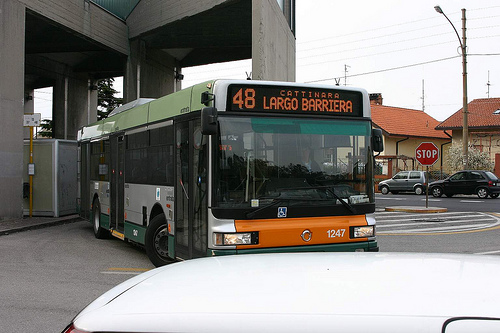

In [28]:
candidate_subset['image'][3]

In [35]:
for i, example in enumerate(candidate_subset):
    inputs = processor(images=example['image'], text=['baby', 'car', 'men', 'bus'],  return_tensors="pt", padding=True)
    outputs = model(**inputs)
    logits = outputs.logits_per_image[0]
    probs = logits.softmax(dim=-1).detach().numpy()
    scores = probs.tolist()

    result = [
    {"score": score, "label": candidate_label}
    for score, candidate_label in sorted(zip(probs, ['baby', 'car', 'men', 'bus']), key=lambda x: -x[0])]

    print(result)

[{'score': 0.97732985, 'label': 'baby'}, {'score': 0.016128186, 'label': 'car'}, {'score': 0.0048061586, 'label': 'men'}, {'score': 0.0017358147, 'label': 'bus'}]
[{'score': 0.99188435, 'label': 'car'}, {'score': 0.0049479255, 'label': 'baby'}, {'score': 0.0024017317, 'label': 'bus'}, {'score': 0.0007659839, 'label': 'men'}]
[{'score': 0.43552166, 'label': 'car'}, {'score': 0.40117392, 'label': 'men'}, {'score': 0.1616946, 'label': 'bus'}, {'score': 0.0016098174, 'label': 'baby'}]
[{'score': 0.99760807, 'label': 'bus'}, {'score': 0.0023605747, 'label': 'car'}, {'score': 1.9011448e-05, 'label': 'men'}, {'score': 1.238534e-05, 'label': 'baby'}]
[{'score': 0.8616234, 'label': 'men'}, {'score': 0.06833585, 'label': 'baby'}, {'score': 0.042928398, 'label': 'bus'}, {'score': 0.027112272, 'label': 'car'}]
